In [8]:
class Phone:
    def __init__(self, date, model, company, phone_type, rating, price, battery_health):
        self.date = date
        self.model = model
        self.company = company
        self.type = phone_type
        self.rating = rating
        self.price = price
        self.battery_health = battery_health
        self.unique_id = id(self)

    def __str__(self):
      attr =[
          str(self.unique_id),
          str(self.date),
          str(self.model),
          str(self.company),
          str(self.type),
          str(self.rating),
          str(self.price),
          str(self.battery_health)
      ]
      return ','.join(attr)

In [9]:
phone1 = Phone('12th May 2023','Galaxy S23 Ultra','Samsung','Android',9.9,999.99,99)
str(phone1)

'2953521749328,12th May 2023,Galaxy S23 Ultra,Samsung,Android,9.9,999.99,99'

In [10]:
class ApplePhone(Phone):
    def __init__(self, date, model, rating, price, battery_health):
        # Calling the constructor of the parent class (Phone) with phone_type set to "iPhone"
        super().__init__(date, model, "Apple", "iPhone", rating, price, battery_health)
        self.ios_version = None


class AndroidPhone(Phone):
    def __init__(self, date, model, rating, price, battery_health):
        # Calling the constructor of the parent class (Phone) with phone_type set to "android"
        super().__init__(date, model, "Android", "android", rating, price, battery_health)
        self.android_version = None

class IPhone(ApplePhone):
    def __init__(self, date, model, rating, price, battery_health):
        super().__init__(date, model, rating, price, battery_health)
        self.company = "IPhone"

class Google(AndroidPhone):
    def __init__(self, date, model, rating, price, battery_health):
        super().__init__(date, model, rating, price, battery_health)
        self.company = "Google"

class Samsung(AndroidPhone):
    def __init__(self, date, model, rating, price, battery_health):
        super().__init__(date, model, rating, price, battery_health)
        self.company = "Samsung"


In [11]:
googlePhone = Google("2022-11-15","modelA", 2, 641, 86.06)
print(str(googlePhone))


2953521450048,2022-11-15,modelA,Google,android,2,641,86.06


In [12]:

#import the modules
import pickle

with open('phonepkl308.dat', 'rb') as fb:
  try: # start of the try block
    while True: # this while loop will be alway entered since the conditional expression will always be True
      phone = pickle.load(fb) #use the pickle module's load statement to read the object

  except EOFError: #code execution will transfer here when the EOF condition is encountered
    pass

print(len(phone))

for i in phone[:10]:
  print(str(i))




10000
134289267906960,2022-08-15,Pixel 4,Google,android,4,534,55.43
134289267903744,2022-01-26,iphone 7,IPhone,apple,5,655,76.57
134289267903792,2022-02-20,Pixel 6,Google,android,3,568,64.55
134289267906096,2022-07-18,Pixel 6,Google,android,4,691,67.07
134289267902064,2022-02-02,Galaxy 4,Samsung,android,5,771,72.3
134289267900528,2022-01-12,iphone 5,IPhone,apple,3,654,71.57
134289267907152,2022-05-15,Pixel 4,Google,android,4,585,64.24
134289267901152,2022-01-11,Pixel 6,Google,android,4,522,45.43
134289267902016,2022-01-21,Galaxy 4,Samsung,android,4,631,81.56
134289267901200,2022-03-04,Pixel 5,Google,android,3,,64.76


In [13]:
with open('data.csv', 'w') as f:
  f.write("unique_id,date,model,company,type,rating,price,battery_health\n")
  for obj in phone:
    f.write(str(obj)+'\n')

In [14]:
#Reading the csv file and Filling out the missing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

df.info()

ModuleNotFoundError: No module named 'pandas'

In [15]:
df.isnull().sum()

NameError: name 'df' is not defined

In [ ]:
#total no, of missing values
df.isnull().sum().sum()

1766

In [ ]:
#total data frame size
df.size

80000

In [ ]:
#total number of rows and cols in data frame
df.shape

(10000, 8)

In [ ]:
#percentage of missing values
df.isnull().sum().sum()/df.size*100

2.2075

In [ ]:
#aggregate measures across whole cols
print(df['date'].mode()[0])
print(df['rating'].mean())

2022-01-18
4.038956958843858


In [ ]:
#aggregate measures at the level of granuality of model
print(df.groupby('model')['rating'].mean())
print('-------------------------------------------------------------------')
print(df.groupby('model')['price'].mean())
print('-------------------------------------------------------------------')
print(df.groupby('model')['battery_health'].mean())

model
Galaxy 4    4.068865
Galaxy 5    4.023952
Galaxy 6    4.073543
Pixel 4     4.034420
Pixel 5     4.001908
Pixel 6     4.022262
iphone 5    4.021905
iphone 6    4.035509
iphone 7    4.068058
Name: rating, dtype: float64
-------------------------------------------------------------------
model
Galaxy 4    623.923954
Galaxy 5    625.041420
Galaxy 6    626.254122
Pixel 4     623.055354
Pixel 5     627.350962
Pixel 6     621.072776
iphone 5    623.273867
iphone 6    629.063628
iphone 7    626.070780
Name: price, dtype: float64
-------------------------------------------------------------------
model
Galaxy 4    70.324354
Galaxy 5    69.175552
Galaxy 6    70.150019
Pixel 4     69.593229
Pixel 5     69.543346
Pixel 6     69.601573
iphone 5    70.961301
iphone 6    70.661385
iphone 7    69.782005
Name: battery_health, dtype: float64


In [ ]:
#accessing specific aggregate measures at the level of granuality of 'model'
print(df.groupby('model')['rating'].mean()[0])
print('--------------------------------------------------------------')
print(df.groupby('model')['price'].mean()[1])
print('--------------------------------------------------------------')
print(df.groupby('model')['battery_health'].mean()[2])

4.06886517943744
--------------------------------------------------------------
625.0414201183432
--------------------------------------------------------------
70.15001890359169


In [ ]:
#Cols with missing values
cols=['date', 'rating', 'price', 'battery_health']

In [ ]:
#Filling in missing values with aggregate mean at level of granularity of 'model'
df['rating'] = df.groupby('model')['rating'].transform(lambda x: x.fillna(x.mean()))
df['price'] = df.groupby('model')['price'].transform(lambda x: x.fillna(x.mean()))
df['battery_health'] = df.groupby('model')['battery_health'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Filling in the missing value of date through mode within each model group
df['date'] = df.groupby('model')['date'].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
df.isna().sum()

unique_id         0
date              0
model             0
company           0
type              0
rating            0
price             0
battery_health    0
dtype: int64

In [ ]:
#total number of rows and cols in data frame
df.shape

(10000, 8)

## **DATA VISUALIZATION**

Pixel 6     1169
iphone 7    1158
Pixel 4     1145
iphone 5    1099
Galaxy 4    1098
Galaxy 6    1095
iphone 6    1092
Pixel 5     1090
Galaxy 5    1054
Name: model, dtype: int64


<Axes: >

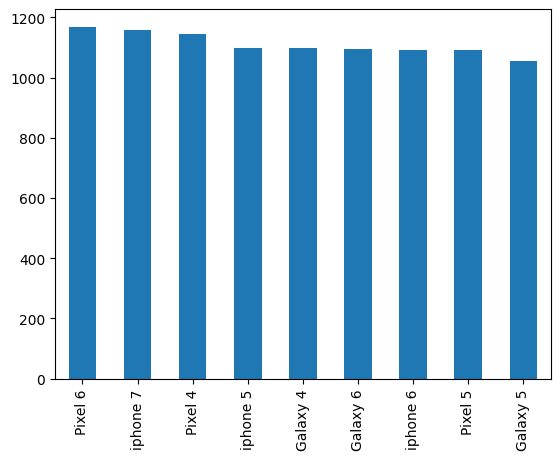

In [ ]:
import matplotlib.pyplot as plt
print(df['model'].value_counts())
df['model'].value_counts().plot(kind='bar')

<Figure size 800x800 with 0 Axes>

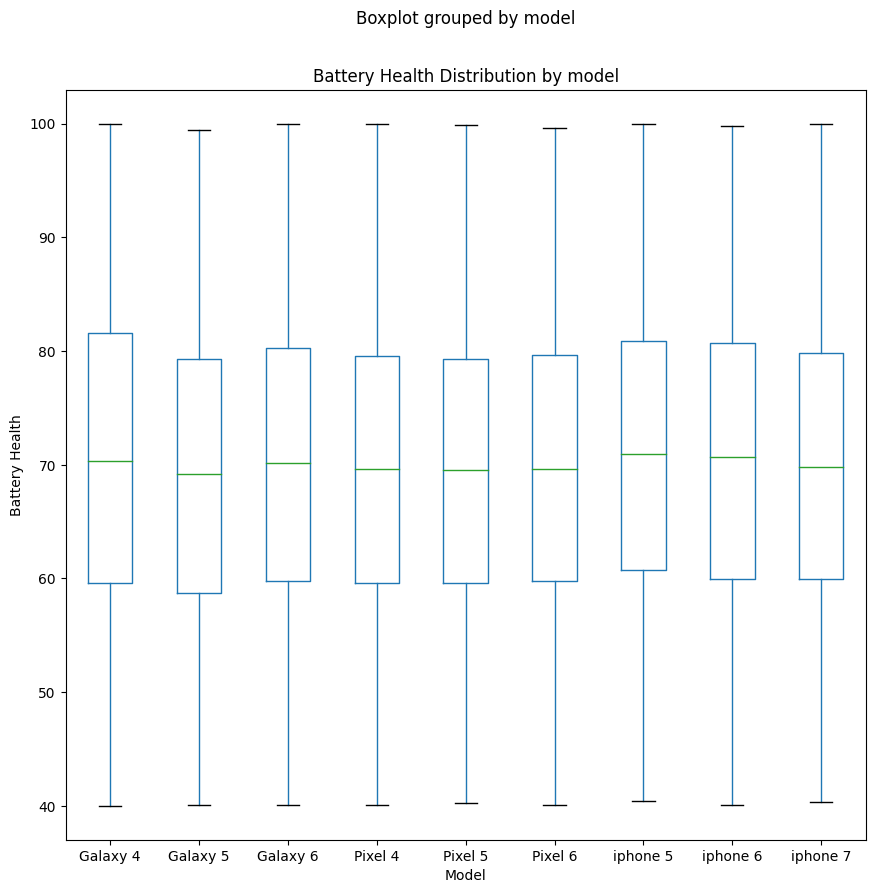

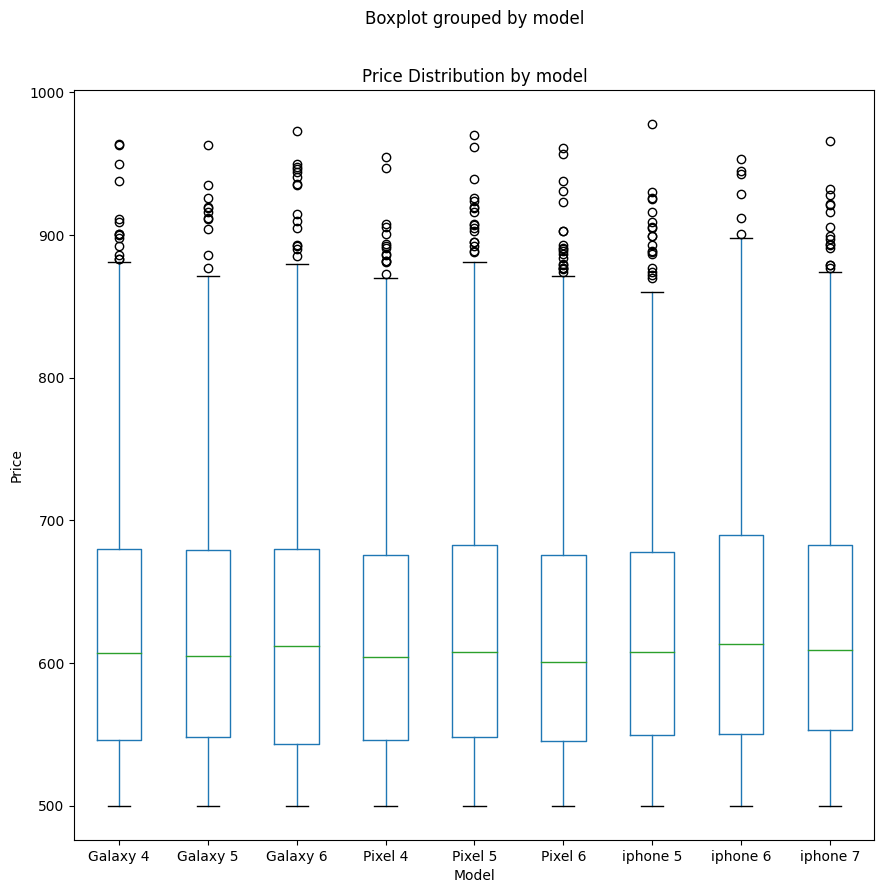

In [ ]:
#boxplot here


plt.figure(figsize=(8,8))

#Creating a boxplot
df.boxplot(column='battery_health', by='model', figsize=(10,10), grid=False )

plt.title('Battery Health Distribution by model')
plt.xlabel('Model')
plt.ylabel('Battery Health')

plt.show()

#Plotting boxplot for price distribution by model
df.boxplot(column='price', by='model', figsize=(10,10), grid=False )

plt.title('Price Distribution by model')
plt.xlabel('Model')
plt.ylabel('Price')

plt.show()

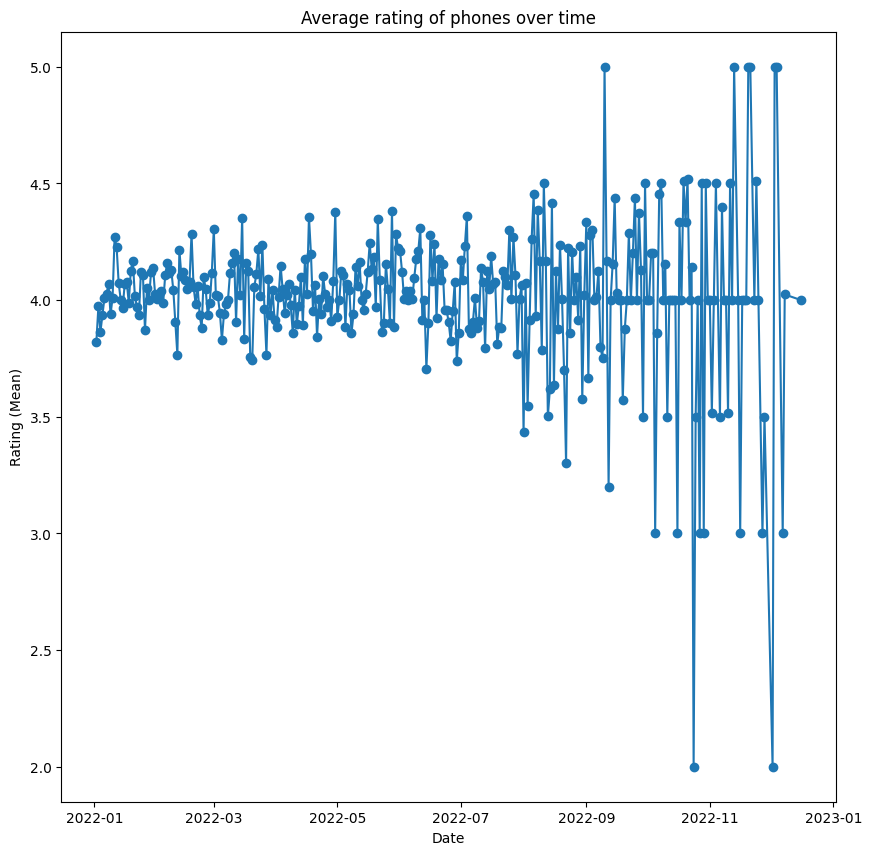

In [ ]:
#line plot

df['date'] = pd.to_datetime(df['date'])

#Sorting data
df= df.sort_values('date')

#Calculating average rating for each day
mean_of_rating= df.groupby('date')['rating'].mean()

#Plotting a line plot
plt.figure(figsize=(10,10))
plt.plot(mean_of_rating.index, mean_of_rating.values, marker='o', linestyle='-')

plt.title('Average rating of phones over time')
plt.xlabel('Date')
plt.ylabel('Rating (Mean)')

plt.show()

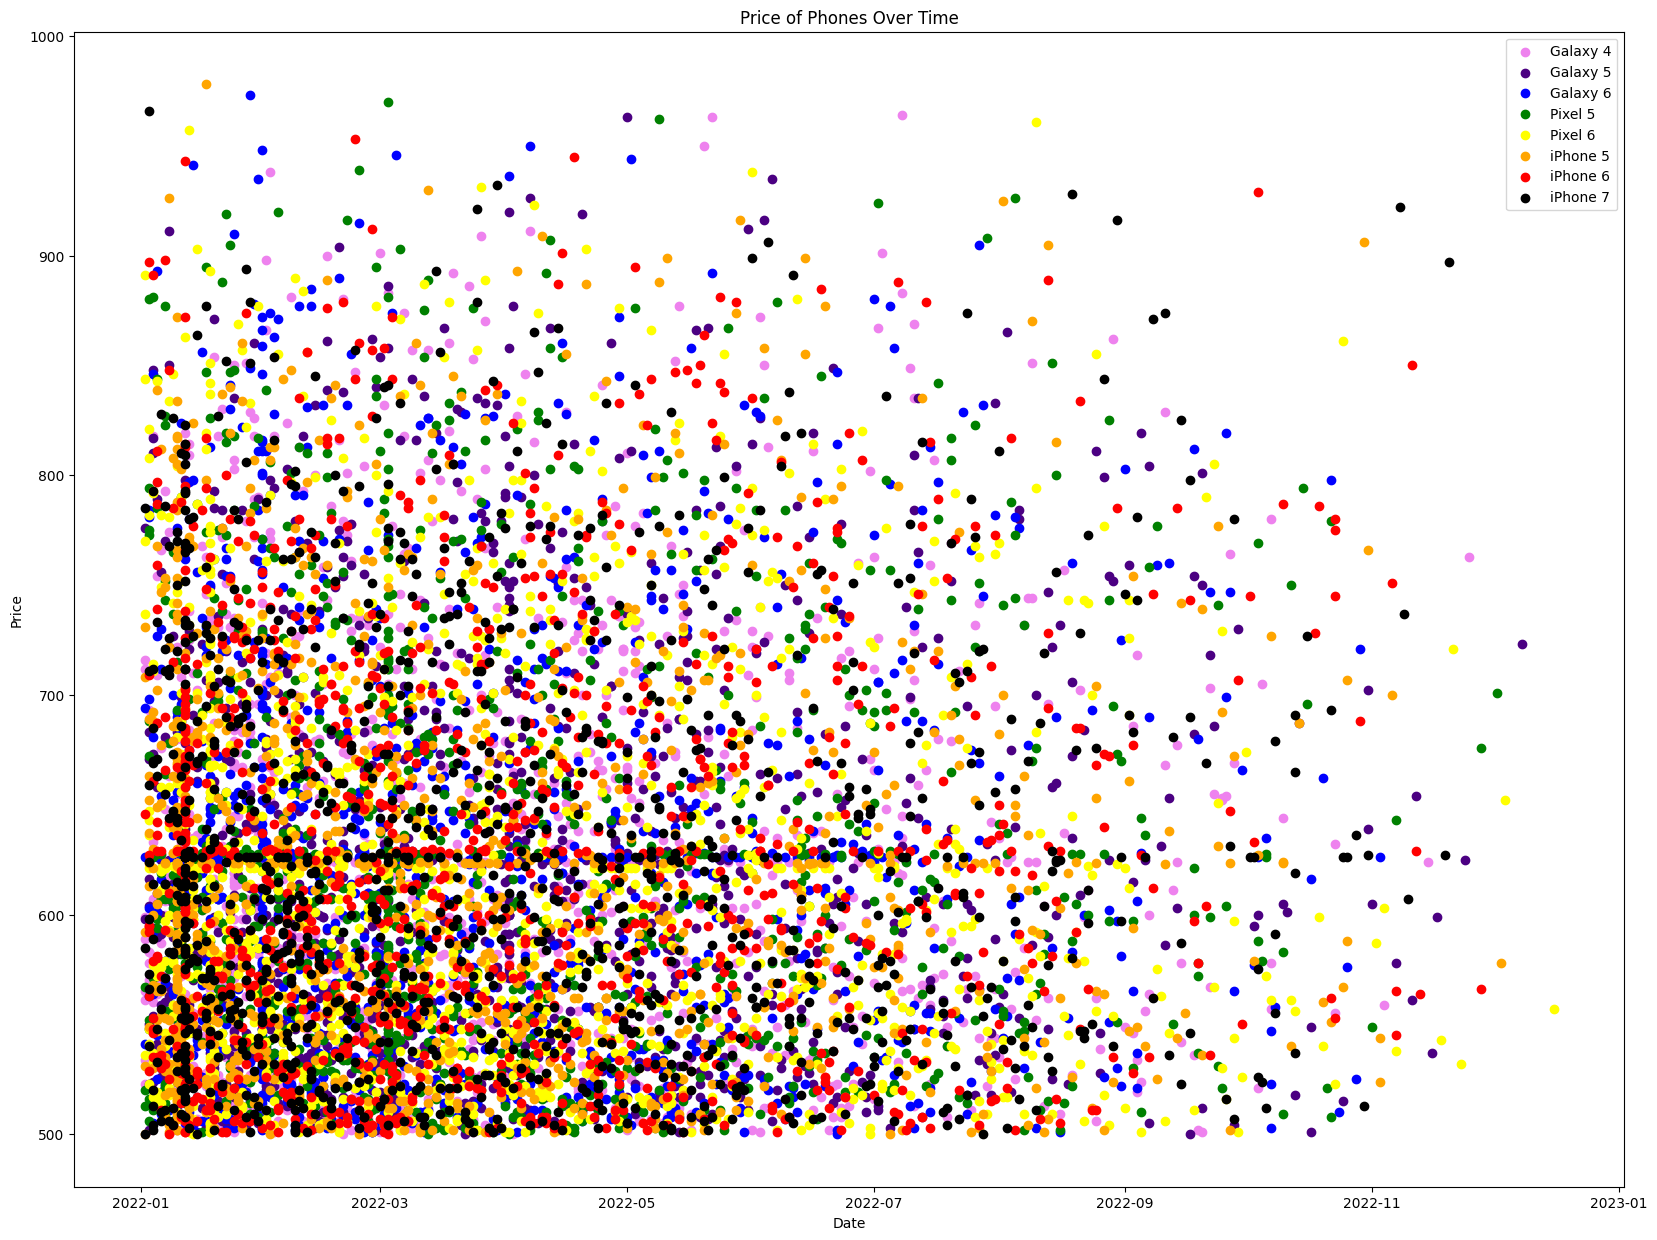

In [ ]:
#Scatter plot

plt.figure(figsize=(20, 15))

plt.title('Price of Phones Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

plt.scatter(df[df['model'] == 'Galaxy 4']['date'], df[df['model'] == 'Galaxy 4']['price'], c='violet', label='Galaxy 4')
plt.scatter(df[df['model'] == 'Galaxy 5']['date'], df[df['model'] == 'Galaxy 5']['price'], c='indigo', label='Galaxy 5')
plt.scatter(df[df['model'] == 'Galaxy 6']['date'], df[df['model'] == 'Galaxy 6']['price'], c='blue', label='Galaxy 6')
plt.scatter(df[df['model'] == 'Pixel 5']['date'], df[df['model'] == 'Pixel 5']['price'], c='green', label='Pixel 5')
plt.scatter(df[df['model'] == 'Pixel 6']['date'], df[df['model'] == 'Pixel 6']['price'], c='yellow', label='Pixel 6')
plt.scatter(df[df['model'] == 'iphone 5']['date'], df[df['model'] == 'iphone 5']['price'], c='orange', label='iPhone 5')
plt.scatter(df[df['model'] == 'iphone 6']['date'], df[df['model'] == 'iphone 6']['price'], c='red', label='iPhone 6')
plt.scatter(df[df['model'] == 'iphone 7']['date'], df[df['model'] == 'iphone 7']['price'], c='black', label='iPhone 7')

plt.legend()

plt.show()



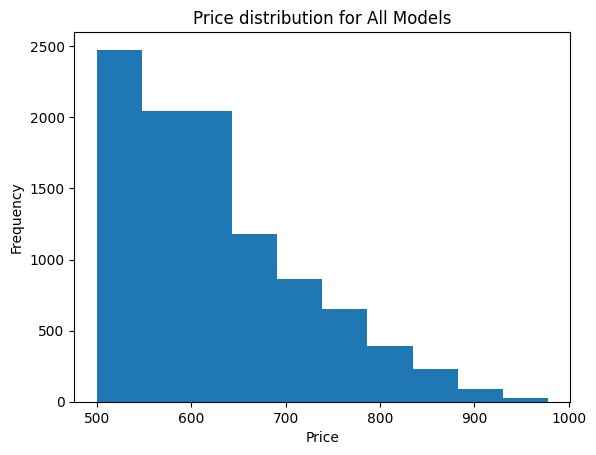

In [ ]:
# histogram

plt.title('Price distribution for All Models')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.hist(df['price'])
plt.show()



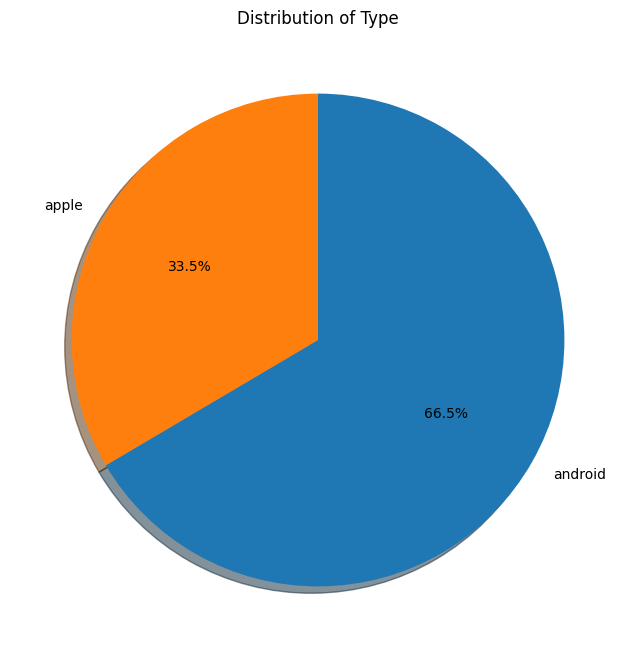

Number of Android phones: 6651
Number of Apple phones: 3349


In [ ]:
#Pie-chart

selected_column = 'type'

column_counts = df[selected_column].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, labeldistance=1.1, shadow='true')
plt.title(f'Distribution of {selected_column.capitalize()}')
plt.show()

print(f"Number of Android phones: {column_counts['android']}")
print(f"Number of Apple phones: {column_counts['apple']}")

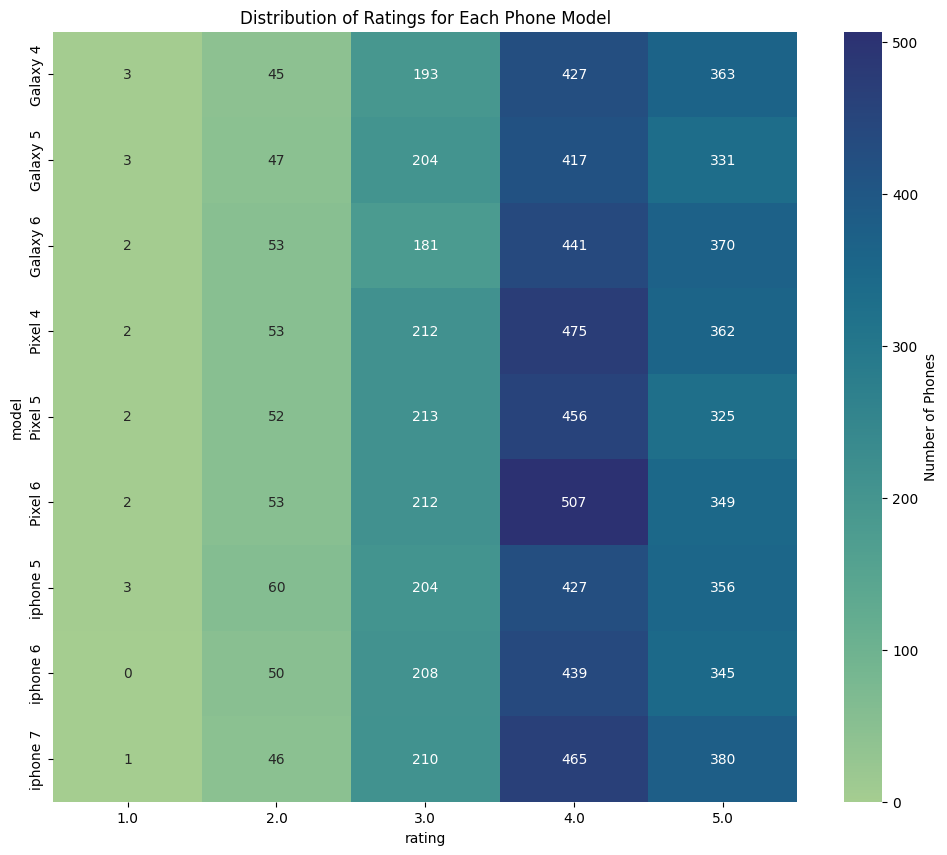

In [ ]:
#HeatMap
import seaborn as sns

heatmap_data = df.pivot_table(index='model', columns='rating', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='crest', cbar_kws={'label': 'Number of Phones'})
plt.title('Distribution of Ratings for Each Phone Model')
plt.show()